---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, size_train, coords_train = train['features'], train['labels'], train['sizes'], train['coords']
X_valid, y_valid, size_valid, coords_valid = valid['features'], valid['labels'], valid['sizes'], valid['coords']
X_test, y_test, size_test, coords_test  = test['features'], test['labels'], test['sizes'], test['coords']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape#[1, size_train.shape[1]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data.
### convert the data set to normalize it.

X_train_norm=np.empty([n_train,image_shape[0],image_shape[1],3])
X_test_norm=np.empty([n_test,image_shape[0],image_shape[1],3])
X_valid_norm=np.empty([n_validation,image_shape[0],image_shape[1],3])

#X_train_norm=X_train/256
#X_test_norm=X_test/256
#X_valid_norm=X_valid/256

#X_train_norm2=(X_train-128)/256

X_train_norm = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test_norm = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
X_valid_norm = (X_valid - X_valid.mean()) / (np.max(X_valid) - np.min(X_valid))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33


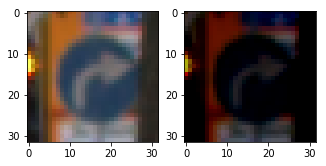

In [5]:
### Data exploration visualization. 
### Compare the Original image, Gray image, and Normalized image

#import random
#import numpy as np
#import cv2
#import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
#%matplotlib inline

index = random.randint(0, len(X_train))
image_norm = X_train_norm[index].squeeze()
#image_norm2 = X_train_norm2[index].squeeze()
image = X_train[index].squeeze()

print(y_train[index])
plt.figure(figsize=(8, 6))
plt.subplot(131)
plt.imshow(image, cmap="gray")

plt.subplot(132)
plt.imshow(image_norm, cmap="gray")

#plt.subplot(133)
#plt.imshow(image_norm2, cmap="gray")
#plt.show()

There are 690 Type 40 images.


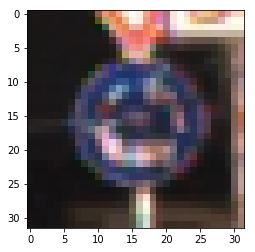

In [6]:
###Check all images of the same type of sign

check_sign=y_train.tolist()

def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs
sign_N=40
list_sign = list_duplicates_of(check_sign, sign_N)
print ('There are %d Type %d images.' % (check_sign.count(14),sign_N))
plt.imshow(X_train[random.choice(list_sign)].squeeze())
#print (list_duplicates_of(check_sign, 14))

In [7]:
### Shuffle the training data.
from sklearn.utils import shuffle

X_train_norm, y_train = shuffle(X_train_norm, y_train)

In [9]:
import tensorflow as tf

learning_rate = 0.001
EPOCHS = 11
BATCH_SIZE = 128

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
# Hyperparameters
mu = 0
sigma = 0.1
dropout=1

conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma),name='conv1_W')
conv1_b = tf.Variable(tf.zeros(6),name='conv1_b')
                      
conv2_W=tf.Variable(tf.truncated_normal(shape=(3,3,6,12),mean=mu,stddev=sigma),name='conv2_W')
conv2_b=tf.Variable(tf.zeros(12),name='conv2_b')

conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 16), mean = mu, stddev = sigma),name='conv3_W')
conv3_b = tf.Variable(tf.zeros(16),name='conv3_b')

fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma),name='fc1_W')
fc1_b = tf.Variable(tf.zeros(120),name='fc1_b')

fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma),name='fc2_W')
fc2_b  = tf.Variable(tf.zeros(84),name='fc2_b')

fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma),name='fc3_W')
fc3_b  = tf.Variable(tf.zeros(43),name='fc3_b')

tf.add_to_collection('vars', conv1_W)
tf.add_to_collection('vars', conv1_b)
tf.add_to_collection('vars', conv2_W)
tf.add_to_collection('vars', conv2_b)
tf.add_to_collection('vars', conv3_W)
tf.add_to_collection('vars', conv3_b)
tf.add_to_collection('vars', fc1_W)
tf.add_to_collection('vars', fc1_b)
tf.add_to_collection('vars', fc2_W)
tf.add_to_collection('vars', fc2_b)
tf.add_to_collection('vars', fc3_W)
tf.add_to_collection('vars', fc3_b)

def LeNet(x):    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    conv2=tf.nn.conv2d(conv1,conv2_W,strides=[1,1,1,1],padding='SAME')+conv2_b    

    # SOLUTION: Activation.
    #conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv3)
    fc0   = tf.nn.dropout(fc0,dropout)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1,dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)

logits=LeNet(x)

beta=0.001
rf1_w=beta*tf.nn.l2_loss(conv1_W)
rf1_b=beta*tf.nn.l2_loss(conv1_b)
rf2_w=beta*tf.nn.l2_loss(conv2_W)
rf2_b=beta*tf.nn.l2_loss(conv2_b)
rf3_w=beta*tf.nn.l2_loss(conv3_W)
rf3_b=beta*tf.nn.l2_loss(conv3_b)
rf3_w=beta*tf.nn.l2_loss(fc1_W)
rf3_b=beta*tf.nn.l2_loss(fc1_b)
rf4_w=beta*tf.nn.l2_loss(fc2_W)
rf4_b=beta*tf.nn.l2_loss(fc2_b)
rf5_w=beta*tf.nn.l2_loss(fc3_W)
rf5_b=beta*tf.nn.l2_loss(fc3_b)

cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss_operation=tf.reduce_mean(cross_entropy)+rf1_w+rf1_b+rf2_w+rf2_b+rf3_w+rf3_b+rf3_w+rf3_b+rf4_w+rf4_b+rf5_w+rf5_b
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation=optimizer.minimize(loss_operation)

cross_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

def evaluation(X_data,y_data):
    num_examples=len(X_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,num_examples,BATCH_SIZE):
        batch_x,batch_y=X_data[offset:offset+BATCH_SIZE],y_data[offset:offset+BATCH_SIZE]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples

X_train_norm.shape


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



(34799, 32, 32, 3)

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

training_data,validation_data,training_label,validation_label=train_test_split(X_train_norm,y_train,test_size=0.2)

saver = tf.train.Saver()
#Training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("Training the model")
    print()
    for i in range(EPOCHS):
        X_train1,y_train1=shuffle(training_data,training_label)
        for offset in range(0,num_examples,BATCH_SIZE):
            end=offset+BATCH_SIZE
            batch_x,batch_y=X_train_norm[offset:end],y_train[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        v_accuracy=evaluation(validation_data,validation_label)
        print("epoch{}:".format(i+1))
        print("the training accuracy:{:.3f}".format(v_accuracy))
        print()
        if v_accuracy>=0.975:
            break
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the validation accuracy is:",accuracy.eval({x:validation_data,y:validation_label}))
    save_path = saver.save(sess, "./model.ckpt")
    print("Model saved in file: %s" % save_path)
    
    print("the test accuracy is:",accuracy.eval({x:X_test_norm,y:y_test}))
    

Training the model

epoch1:
the training accuracy:0.830

epoch2:
the training accuracy:0.934

epoch3:
the training accuracy:0.959

epoch4:
the training accuracy:0.966

epoch5:
the training accuracy:0.980

the validation accuracy is: 0.9797414
Model saved in file: ./model.ckpt
the test accuracy is: 0.88899446


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

5


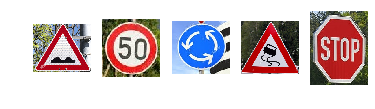

In [14]:
image1=mpimg.imread('bumpy.png')
plt.subplot(1,5,1)
plt.axis('off')
plt.imshow(image1)

image2=mpimg.imread('fifty.png')
plt.subplot(1,5,2)
plt.axis('off')
plt.imshow(image2)

image3=mpimg.imread('round.png')
plt.subplot(1,5,3)
plt.axis('off')
plt.imshow(image3)

image4=mpimg.imread('slip.png')
plt.subplot(1,5,4)
plt.axis('off')
plt.imshow(image4)

image5=mpimg.imread('stop.png')
plt.subplot(1,5,5)
plt.axis('off')
plt.imshow(image5)

label=[22,2,40,23,14]
print(len(label))

resized_image1 = cv2.resize(image1, (32, 32))
resized_image2= cv2.resize(image2 ,(32, 32))
resized_image3= cv2.resize(image3,(32, 32))
resized_image4=cv2.resize(image4,(32, 32))
resized_image5=cv2.resize(image5,(32, 32))

selected_images=[]
selected_images.append(resized_image1[:,:,0:3])
selected_images.append(resized_image2[:,:,0:3]) 
selected_images.append(resized_image3[:,:,0:3])
selected_images.append(resized_image4[:,:,0:3]) 
selected_images.append(resized_image5[:,:,0:3])
selected_images=np.array(selected_images)
selected_images.shape

selected_norm=np.empty([len(label),image_shape[0],image_shape[1],3])

selected_norm = (selected_images - selected_images.mean()) / (np.max(selected_images) - np.min(selected_images))

dic=['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',\
     'Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)','No passing',\
     'No passing for vehicles over 3.5 metric tons','Right-of-way at the next intersection','Priority road',\
     'Yield','Stop','No vehicles','Vehicles over 3.5 metric tons prohibited','No entry','General caution',\
     'Dangerous curve to the left','Dangerous curve to the right','Double curve','Bumpy road','Slippery road',\
     'Road narrows on the right','Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing',\
     'Beware of ice/snow','Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',\
     'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',\
     'End of no passing','End of no passing by vehicles over 3.5 metric tons']

predict=tf.argmax(logits,1)
showprob=tf.nn.top_k(tf.nn.softmax(logits), k=5)

### Predict the Sign Type for Each Image

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Testing the model on new images

INFO:tensorflow:Restoring parameters from ./model.ckpt
the neural network predicts picture 1 as label 22:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



The meaning  Bumpy road
The actual label is 22. The meaning is Bumpy road:
 
the neural network predicts picture 2 as label 2:
The meaning  Speed limit (50km/h)
The actual label is 2. The meaning is Speed limit (50km/h):
 
the neural network predicts picture 3 as label 40:
The meaning  Roundabout mandatory
The actual label is 40. The meaning is Roundabout mandatory:
 
the neural network predicts picture 4 as label 23:
The meaning  Slippery road
The actual label is 23. The meaning is Slippery road:
 
the neural network predicts picture 5 as label 14:
The meaning  Stop
The actual label is 14. The meaning is Stop:
 
the total accuracy of my selected images is:  1.0
 
TopKV2(values=array([[1.00000000e+00, 7.02801728e-09, 1.63767844e-09, 9.09931519e-10,
        1.08950196e-10],
       [9.84914899e-01, 1.50785912e-02, 6.52182280e-06, 5.70219205e-10,
        5.19124188e-10],
       [1.00000000e+00, 1.90830818e-08, 1.47784107e-09, 8.81813123e-10,
        7.58342417e-11],
       [9.99071717e-0

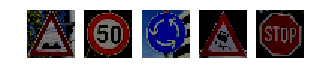

In [19]:
saver = tf.train.Saver()
with tf.Session() as sess:
    print("Testing the model on new images")
    print()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./model.ckpt")

    res=predict.eval({x:selected_norm})
    prob=sess.run(showprob,feed_dict={x:selected_norm})
    countaccuracy=0
    for i in range(len(label)):
        print("the neural network predicts picture {} as label {}:".format(i+1,res[i]))
        print("The meaning ",dic[res[i]])
        print("The actual label is {}. The meaning is {}:".format(label[i],dic[label[i]]))
        print(" ")
        plt.subplot(1,len(label)+1,i+1)
        plt.axis('off')
        plt.imshow(selected_norm[i].squeeze())
        if(label[i]==res[i]):
            countaccuracy+=1
    print("the total accuracy of my selected images is: ",countaccuracy/len(label))
    print(" ")
    print(prob)  

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.